In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wooldridge as woo
import statsmodels.formula.api as smf

# Exercise 5

Use the dataset **wage1** from `wooldridge`


1. Regress wage on education.
1. Compute the fitted values and residuals "by hand" using the information contained in the object returned by the method `fit`. 
1. Make a dataframe containing the fitted values and the residuals and display it.
1. Display the regression results using the method `summary`
1. Confirm the three properties of OLS statistics: $Cov(x_i,\hat{u}_i)=0$, $\bar{u}=0$ and $\bar{y}=\hat{\beta}_0+\hat{\beta}_1\cdot\bar{x}$
1. Compute the $R^2$ using the two methods we've learned.
1. How large is it? What does it say?

In [3]:
df = woo.dataWoo('wage1')
df.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [4]:
df.describe()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,...,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,...,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000


**1.** Regress wage on education.

In [5]:
reg = smf.ols(formula='wage ~ educ', data=df)
results = reg.fit()
b = results.params

b0, b1 = b[0], b[1]

print(f"wage = b0 + b1 * educ + u \n with \n b0 = {b0} \n b1 = {b1}")

wage = b0 + b1 * educ + u 
 with 
 b0 = -0.9048516119572085 
 b1 = 0.541359254665175


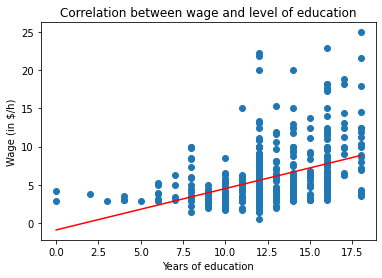

In [6]:
# Plot the fit

plt.scatter(df['educ'], df['wage'])
educ_axis = np.linspace(df['educ'].min(), df['educ'].max(), 100)
plt.title('Correlation between wage and level of education')
plt.xlabel('Years of education')
plt.ylabel('Wage (in $/h)')
plt.plot(educ_axis, b0 + b1 * educ_axis, color='red')
plt.show()

**2.** Compute the fitted values and residuals "by hand" using the information contained in the object returned by the method `fit`.

In [7]:
#wage_hat = results.fittedvalues
#u_hat = results.resid

wage_hat = b0 + b1 * df['educ']
residuals = df['wage'] - wage_hat

**3.** Make a dataframe containing the fitted values and the residuals and display it.

In [8]:
table = pd.DataFrame({'educ': df['educ'],
                      'wage': df['wage'],
                      'wage_hat': wage_hat,
                      'u_hat': residuals})
table.head()

,educ,wage,wage_hat,u_hat
0,11,3.10,5.050100,-1.950100
1,12,3.24,5.591459,-2.351459
2,11,3.00,5.050100,-2.050100
3,8,6.00,3.426022,2.573978
4,12,5.30,5.591459,-0.291459


**4.** Display the regression results using the method `summary`.

In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           2.78e-22
Time:                        10:44:05   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.187      -2.250       0.441
educ           0.5414      0.053     10.167      0.000       0.437       0.646
==============================================================================
Omnibus:                      212.554   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              807.843
Skew:                           1.861   Prob(JB):                    3.79e-176
Kurtosis:                       7.797   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**5.** Confirm the three properties of OLS statistics:  $Cov(x_i,\hat{u}_i)=0$, $\bar{u}=0$ and $\bar{y}=\hat{\beta}_0+\hat{\beta}_1\cdot\bar{x}$.

In [10]:
print(f"Cov(x_i, u_hat_i) : {table['educ'].cov(table['u_hat'])}")
print(f"mean of u: {table['u_hat'].mean()}")
print(f"y_mean = beta_hat_0 + beta_hat_1 * x_mean : {table['wage'].mean() - b0 - b1 * table['educ'].mean()}")

Cov(x_i, u_hat_i) : -2.1992989440193578e-15
mean of u: -7.618747204728071e-15
y_mean = beta_hat_0 + beta_hat_1 * x_mean : -7.993605777301127e-15


**6.** Compute the $R^2$ using the two methods we've learned.

**7.** How large is it? What does it say?

# Exercise 6

Use the 'wage1' data.

This are the included variables:

wage: average hourly earnings  
educ: years of education  
exper: years potential experience  
tenure: years with current employer  
nonwhite: =1 if nonwhite  
female: =1 if female  
married: =1 if married  
numdep: number of dependents  
smsa: =1 if live in SMSA  
northcen: =1 if live in north central U.S  
south: =1 if live in southern region  
west: =1 if live in western region  
construc: =1 if work in construc. indus.  
ndurman: =1 if in nondur. manuf. indus.  
trcommpu: =1 if in trans, commun, pub ut  
trade: =1 if in wholesale or retail  
services: =1 if in services indus.  
profserv: =1 if in prof. serv. indus.  
profocc: =1 if in profess. occupation  
clerocc: =1 if in clerical occupation  
servocc: =1 if in service occupation  
lwage: log(wage)  
expersq: exper^2  
tenursq: tenure^2  


In [11]:
df = woo.dataWoo('wage1')
df.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


**1.** Estimate effect of gender on wages: How do yo interpret the coefficient of being female?

Let's regress the wage on the gender (1 for female, 0 for male).

In [12]:
reg = smf.ols(formula='wage ~ female', data=df)
results = reg.fit()
b0, b1 = results.params[0], results.params[1]
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     68.54
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           1.04e-15
Time:                        10:44:05   Log-Likelihood:                -1400.7
No. Observations:                 526   AIC:                             2805.
Df Residuals:                     524   BIC:                             2814.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0995      0.210     33.806      0.000       6.687       7.512
female        -2.5118      0.303     -8.279      0.000      -3.108      -1.916
==============================================================================
Omnibus:                      223.488   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              929.998
Skew:                           1.928   Prob(JB):                    1.13e-202
Kurtosis:                       8.250   Cond. No.                         2.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
print(f"Wages are explained by the gender in an amount of 12%.")
print(f"Males average wage is : {b0}.")
print(f"Women tend to win {abs(b1) * 100}% less than men.")

Wages are explained by the gender in an amount of 12%.
Males average wage is : 7.099489067157689.
Women tend to win 251.18303269323982% less than men.


I personnaly find this figure is really too high. Though, I can't find my mistake...

**2.** Now estimate the effect of log(wages) on being a women.

In [14]:
reg = smf.ols(formula='female ~ lwage', data=df)
results = reg.fit()
b0, b1 = results.params[0], results.params[1]
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 female   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     85.04
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           7.10e-19
Time:                        10:44:06   Log-Likelihood:                -341.75
No. Observations:                 526   AIC:                             687.5
Df Residuals:                     524   BIC:                             696.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0497      0.065     16.124      0.000       0.922       1.178
lwage         -0.3515      0.038     -9.222      0.000      -0.426      -0.277
==============================================================================
Omnibus:                     5198.753   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.575
Skew:                           0.010   Prob(JB):                     4.67e-11
Kurtosis:                       1.527   Cond. No.                         7.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
print(f"When one's salary increases by 1%, the probabylity to be a women decreseases by {abs(b1) * 100}%.")

When one's salary increases by 1%, the probabylity to be a women decreseases by 35.15324600492544%.


**3.** Do you think the effect of gender is causal? What could be reasons that this is not the cas? What does it mean in terms of the zero conditional mean assumption?

I do believe a part of the gender gap is explained by the direct causality between gender and wage.

However, the simple treatement of our data that has been made just above does not allow us to conclude that. Indeed some variable are not taking into account. For instance, one can figure out that women tend to occupate lower payed jobs. The ceteris paribus condition is thus not verified.

**4.** What is the reason for only including female into this regression but not both male and female?

`Female` is a boolean. Including `female` into the regression is equivalent to treat both male and female. This is a binary regression.

Adding a male indicator would create a perfect colinearity. It would be redondant.

**5** Add education and experience to the model and re-estimate it. How does the results change?

Let the model be:
$$wage = \beta_0 + \beta_1 \cdot female + \beta_2 \cdot educ + \beta_3 \cdot exper + u$$

In [16]:
reg = smf.ols(formula='wage ~ female + educ + exper', data=df)
results = reg.fit()
b0, b1, b2, b3 = results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     77.92
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           1.15e-41
Time:                        10:44:06   Log-Likelihood:                -1335.7
No. Observations:                 526   AIC:                             2679.
Df Residuals:                     522   BIC:                             2697.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7345      0.754     -2.302      0.022      -3.215      -0.254
female        -2.1555      0.270     -7.974      0.000      -2.687      -1.624
educ           0.6026      0.051     11.788      0.000       0.502       0.703
exper          0.0642      0.010      6.177      0.000       0.044       0.085
==============================================================================
Omnibus:                      198.657   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              785.181
Skew:                           1.702   Prob(JB):                    3.16e-171
Kurtosis:                       7.923   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**6.** Assume that being female and experience are negatively correlated. A reason why this could be is because women work more often part-time or are more often on maternity leave. Will it cause a bias if you exclude experience from the model? If yes, in which direction will the bias go?

By ommiting experience from the model, which is here supposed to be correlated with the gender, it creates a bias.

Because the coefficient of the experience is positive and the correlation between gender and experience is negative, the bias is a negative one.

**7.** Add one by one the variables tenure, married, ndurman, services, trade and profocc. How do the results change?

In [17]:
param_to_add = ['tenure', 'married', 'ndurman', 'services', 'trade', 'profocc']
form = 'wage ~ female + educ + exper'
r2 = [] # For question 8
r2_adj = [] # For question 9


for param in param_to_add:
    form += ' + ' + param
    reg = smf.ols(formula=form, data = df)
    results = reg.fit()
    b = results.params
    print(f"With {form}, we get :\n {results.summary()}")
    r2.append(results.rsquared)
    r2_adj.append(results.rsquared_adj)

With wage ~ female + educ + exper + tenure, we get :
                             OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     74.40
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           7.30e-50
Time:                        10:44:06   Log-Likelihood:                -1314.2
No. Observations:                 526   AIC:                             2638.
Df Residuals:                     521   BIC:                             2660.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

**8.** How does the $R^2$ change (not the adjusted one)?

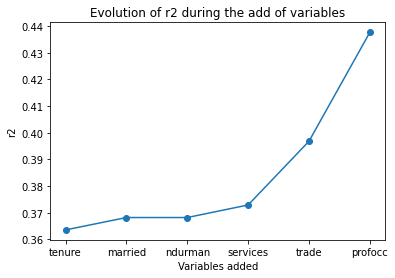

In [18]:
# Plot r2

plt.plot(range(len(param_to_add)), r2, marker='o')
plt.title('Evolution of r2 during the add of variables')
plt.xlabel('Variables added')
plt.ylabel('r2')
plt.xticks(range(len(param_to_add)), labels=param_to_add)
plt.show()

We understand trade and profocc have statistically significant effects on r2.

On the other other hand, ndurman has quasi none effect.

Finally, married, and services have limitted effects.

**9.** Does it necessarily mean that your model is better when the R2 is higher? If not, why not?

No. In fact by adding multiple variables, the r2 is automatically increased. We sould rather consider the adjusted r2.

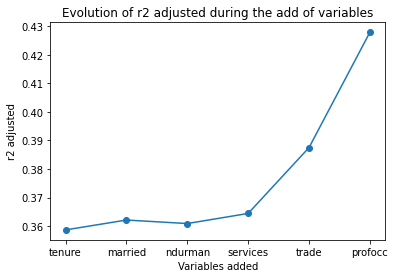

In [19]:
# Plot r2_adj

plt.plot(range(len(param_to_add)), r2_adj, marker='o')
plt.title('Evolution of r2 adjusted during the add of variables')
plt.xlabel('Variables added')
plt.ylabel('r2 adjusted')
plt.xticks(range(len(param_to_add)), labels=param_to_add)
plt.show()

In fact, we can conclude that trade and profocc have a significant impact on our model.

**10.** What does it mean if the error terms are heteroskedastical?

**11.** Built a variable `male` which is one if female is zero and 0 if female is 1.

In [20]:
df['male'] = 1 - df['female']
df.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,male
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,1.131402,4,0,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,1,0,0,0,1,1.175573,484,4,0
2,3.00,11,2,0,0,0,0,2,0,0,...,1,0,0,0,0,0,1.098612,4,0,1
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,1,0,1.791759,1936,784,1
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,1.667707,49,4,1


**12.** Regress male and female on wages. What happens and why?

In [21]:
reg_m = smf.ols(formula='male ~ wage', data=df)
results_m = reg_m.fit()
print(f"Regress men : {results_m.summary()}")

reg_f = smf.ols(formula='female ~ wage', data=df)
results_f = reg_m.fit()
print(f"Regress female : {results_f.summary()}")

Regress men :                             OLS Regression Results                            
Dep. Variable:                   male   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     68.54
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           1.04e-15
Time:                        10:46:16   Log-Likelihood:                -348.98
No. Observations:                 526   AIC:                             702.0
Df Residuals:                     524   BIC:                             710.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2494      0.039      

The parameters and rsquarred are the same.

# Exercise 7

Load the data 'cig85_95'

1. Estimate the effect of the log(package price) on log(packs per capita). Whats is the interpretation of the coeffcient? 
1. Now the effect of log(package price) on packs per capita. Whats is the interpretation of the coeffcient? 
1. Now the effect of package price on log(packs per capita). Whats is the interpretation of the coeffcient? 
1. And now the effect of package price on packs per capaita. Whats is the interpretation of the coeffcient? 
1. Let's use the last model where x and y are in levels. What is the p-value of packs per capita and what does it mean? 

In [24]:
df0 = pd.read_stata('data/cig85_95.dta', iterator=True)
df0.variable_labels()

{'state': '',
 'year': '',
 'cpi': '',
 'pop': 'population from RAs before 1990; from web for 1990-2000',
 'packpc': 'packs per capita = packs/pop',
 'income': 'state personal income (total, nominal)',
 'tax': 'average state, federal, and average local excise taxes for   fiscal year',
 'avgprs': 'average price during fiscal year, including sales taxes',
 'taxs': 'average excise taxes for fiscal year, including sales taxes'}

In [22]:
df = pd.read_stata('data/cig85_95.dta')
df.head()

,state,year,cpi,pop,packpc,income,tax,avgprs,taxs
0,AL,1985.0,1.076,3973000.0,116.486282,46014968.0,32.500004,102.181671,33.348335
1,AR,1985.0,1.076,2327000.0,128.534592,26210736.0,37.000000,101.474998,37.000000
2,AZ,1985.0,1.076,3184000.0,104.522614,43956936.0,31.000000,108.578751,36.170418
3,CA,1985.0,1.076,26444000.0,100.363037,447102816.0,26.000000,107.837341,32.104000
4,CO,1985.0,1.076,3209000.0,112.963539,49466672.0,31.000000,94.266663,31.000000


In [23]:
df.describe()

,year,cpi,pop,packpc,income,tax,avgprs,taxs
count,528.000000,528.000000,528.0,528.000000,528.0,528.000000,528.000000,528.000000
mean,1990.000000,1.295818,5159738.5,106.454964,99245552.0,40.348045,150.252808,46.181175
std,3.165277,0.152284,5448904.5,23.124228,117020464.0,12.356200,33.116825,14.880633
min,1985.000000,1.076000,453401.0,49.272198,6769883.0,18.000000,84.967995,20.812500
25%,1987.000000,1.136000,1579248.0,91.405214,25100460.5,32.000000,121.388748,36.000000
50%,1990.000000,1.307000,3628253.5,105.909554,61692010.0,39.000000,150.535088,43.000000
75%,1993.000000,1.445000,6012163.0,119.592928,118084118.0,46.312500,173.748547,53.161585
max,1995.000000,1.524000,31493524.0,197.993988,771470144.0,99.000000,240.849670,112.633003


**1.** Estimate the effect of the log(package price) on log(packs per capita). What is the interpretation of the coefficient?

In [27]:
reg = smf.ols(formula='np.log(packpc) ~ np.log(avgprs)', data=df)
results = reg.fit()
b0, b1 = results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(packpc)   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     274.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           5.70e-50
Time:                        10:56:27   Log-Likelihood:                 163.83
No. Observations:                 528   AIC:                            -323.7
Df Residuals:                     526   BIC:                            -315.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.4887      0.172     43.603      0.000       7.151       7.826
np.log(avgprs)    -0.5703      0.034    -16.579      0.000      -0.638      -0.503
==============================================================================
Omnibus:                       41.478   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.645
Skew:                          -0.407   Prob(JB):                     1.40e-22
Kurtosis:                       4.978   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

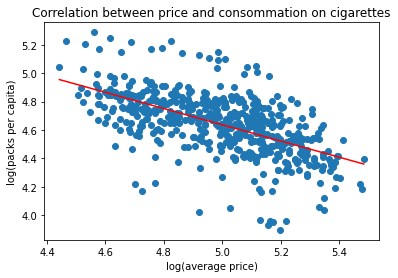

In [31]:
plt.scatter(np.log(df['avgprs']), np.log(df['packpc']))
avgprs_axis = np.linspace(np.log(df['avgprs'].min()), np.log(df['avgprs'].max()), 100)
plt.plot(avgprs_axis, b0 + b1 * avgprs_axis, color='red')
plt.title('Correlation between price and consommation on cigarettes')
plt.xlabel('log(average price)')
plt.ylabel('log(packs per capita)')
plt.show()

An increase of 1 percent of the price of a pack reduces the consommation by 57% percent.

**2.** Now the effect of package price on log(packs per capita). What is the interpretation of the coefficient?

In [34]:
reg = smf.ols(formula='np.log(packpc) ~ avgprs', data=df)
results = reg.fit()
b0, b1 = results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(packpc)   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     283.6
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           3.24e-51
Time:                        11:03:29   Log-Likelihood:                 166.70
No. Observations:                 528   AIC:                            -329.4
Df Residuals:                     526   BIC:                            -320.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2326      0.036    146.250      0.000       5.162       5.303
avgprs        -0.0039      0.000    -16.841      0.000      -0.004      -0.003
==============================================================================
Omnibus:                       45.588   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.369
Skew:                          -0.443   Prob(JB):                     2.41e-25
Kurtosis:                       5.090   Cond. No.                         715.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

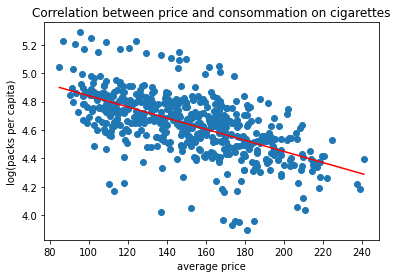

In [36]:
plt.scatter(df['avgprs'], np.log(df['packpc']))
avgprs_axis = np.linspace(df['avgprs'].min(), df['avgprs'].max(), 100)
plt.plot(avgprs_axis, b0 + b1 * avgprs_axis, color='red')
plt.title('Correlation between price and consommation on cigarettes')
plt.xlabel('average price')
plt.ylabel('log(packs per capita)')
plt.show()

An increase of 1$ on a pack decreases the consommation by 0.4%.

**3.** And now the effect of package price on packs per capita. What is the interpretation of the coefficient?

In [37]:
reg = smf.ols(formula='packpc ~ avgprs', data=df)
results = reg.fit()
b0, b1 = results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 packpc   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     274.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           6.86e-50
Time:                        11:07:37   Log-Likelihood:                -2296.3
No. Observations:                 528   AIC:                             4597.
Df Residuals:                     526   BIC:                             4605.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    167.8774      3.797     44.207      0.000     160.417     175.337
avgprs        -0.4088      0.025    -16.562      0.000      -0.457      -0.360
==============================================================================
Omnibus:                       62.605   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.231
Skew:                           0.632   Prob(JB):                     1.07e-32
Kurtosis:                       5.257   Cond. No.                         715.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

An increase of 1$ of a pack reduces the consommation by 0.4 pack.

**5.** Let's use the last model where x and y are in levels. What is the p-value of packs per capita and what does it mean?

??????

# Exercise 8

**Example: Explaining Arrest Records**

<blockquote>
CRIME1 contains data on arrests during the year 1986 and other information on 2,725 men born in either 1960 or 1961 in California. Each man in the sample was arrested at least once prior to 1986.
The variable _narr86_ is the number of times the man was arrested during 1986: it is zero for most men in the sample (72.29%), and it varies from 0 to 12. (The percentage of men arrested once during 1986 was 20.51.) The variable _pcnv_ is the proportion (not percentage) of arrests prior to 1986 that led
to conviction, _avgsen_ is average sentence length served for prior convictions (zero for most people), _ptime86_ is months spent in prison in 1986, and _qemp86_ is the number of quarters during which the man was employed in 1986 (from zero to four).  
    
A linear model explaining arrests is

\begin{equation*}
narr86=\beta_0+\beta_1pcnv+\beta_2avgsen+\beta_3ptime86+\beta_4qemp86+u
\end{equation*}


where _pcnv_ is a proxy for the likelihood for being convicted of a crime and _avgsen_ is a measure of expected severity of punishment, if convicted. The variable _ptime86_ captures the incarcerative effects of crime: if an individual is in prison, he cannot be arrested for a crime outside of prison. Labor market opportunities are crudely captured by _qemp86_. </blockquote>

1. Estimate the model and interpret the results. Do they intuitively make sense? 


In [38]:
df = woo.dataWoo('CRIME1')
df.head()

,narr86,nfarr86,nparr86,pcnv,avgsen,tottime,ptime86,qemp86,inc86,durat,black,hispan,born60,pcnvsq,pt86sq,inc86sq
0,0,0,0,0.38,17.600000,35.200001,12,0.0,0.0,0.0,0,0,1,0.1444,144,0.000000
1,2,2,0,0.44,0.000000,0.000000,0,1.0,0.8,0.0,0,1,0,0.1936,0,0.640000
2,1,1,0,0.33,22.799999,22.799999,0,0.0,0.0,11.0,1,0,1,0.1089,0,0.000000
3,2,2,1,0.25,0.000000,0.000000,5,2.0,8.8,0.0,0,1,1,0.0625,25,77.440002
4,1,1,0,0.00,0.000000,0.000000,0,2.0,8.1,1.0,0,0,0,0.0000,0,65.610008


In [42]:
reg = smf.ols(formula='narr86 ~ pcnv + avgsen + ptime86 + qemp86', data=df)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 narr86   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     29.96
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           2.01e-24
Time:                        11:12:09   Log-Likelihood:                -3393.5
No. Observations:                2725   AIC:                             6797.
Df Residuals:                    2720   BIC:                             6826.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7068      0.033     21.319      0.000       0.642       0.772
pcnv          -0.1508      0.041     -3.692      0.000      -0.231      -0.071
avgsen         0.0074      0.005      1.572      0.116      -0.002       0.017
ptime86       -0.0374      0.009     -4.252      0.000      -0.055      -0.020
qemp86        -0.1033      0.010     -9.940      0.000      -0.124      -0.083
==============================================================================
Omnibus:                     2396.990   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106841.658
Skew:                           4.006   Prob(JB):                         0.00
Kurtosis:                      32.611   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We get :
- $\beta_1<0$ which is a bit surprising. It could be thought one's more likely to be arrested after having been once. However it's satisfying and show people are not likely to recedive.
- $\beta_2>0$ which is intutively correct : the higher sentence you get, the more likely to be arrested you are.
- $\beta_3<0$ which is surprising : I'd say it'd rather be logical if $\beta_2$ and $\beta_3$ had the same sign.
- $\beta_4<0$ is also surpsing. It could be thought people who work have a more stable situation and are thus more unlikely to be arrested.

This model doesn't seem to be satisfying.